# 📚 Goodreads Books Dataset – EDA in Python

This notebook is a hands-on, exploratory dive into a dataset of over 10,000 books from Goodreads.  

You can find the dataset here: [Goodreads Books Dataset on GitHub](https://github.com/zygmuntz/goodbooks-10k)

The goal of this notebook was not to answer a specific business question or build a polished final product — it was to **practice exploratory data analysis** and to **deepen my understanding of Python** within an analytical context.

I used tools like **pandas**, **matplotlib**, and **seaborn** to explore patterns in the data, generate charts, and experiment with different ways of presenting insights. I

There’s no fixed hypothesis here — just curiosity and code.

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load dataset from CSV
df = pd.read_csv("../data/books.csv")

# Preview to understand structure and sample rows
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
# Check total number of rows vs unique rows to assess duplicates or data quality
print("Total rows:", len(df))
print("Unique rows:", df.drop_duplicates().shape[0])

Total rows: 10000
Unique rows: 10000


In [ ]:
# Rename columns for consistency + readability
df = df.rename(columns={
    'book_id': 'Book ID',
    'goodreads_book_id': 'Goodreads Book ID',
    'best_book_id': 'Best Book ID',
    'work_id': 'Work ID',
    'books_count': 'Book Editions Count',
    'isbn': 'ISBN',
    'isbn13': 'ISBN13',
    'authors': 'Authors',
    'original_publication_year': 'Original Publication Year',
    'original_title': 'Original Title',
    'title': 'Title',
    'language_code': 'Language Code',
    'average_rating': 'Average Rating',
    'ratings_count': 'Ratings Count',
    'work_ratings_count': 'Work Ratings Count',
    'work_text_reviews_count': 'Text Reviews Count',
    'ratings_1': '1 Star Ratings',
    'ratings_2': '2 Star Ratings',
    'ratings_3': '3 Star Ratings',
    'ratings_4': '4 Star Ratings',
    'ratings_5': '5 Star Ratings',
    'image_url': 'Image URL',
    'small_image_url': 'Small Image URL'
})

# Drop columns irrelevant for analysis to reduce noise and improve clarity
# IDs and image URLs are not needed here, based upon simple excel analysis (refactored throughout)
df = df.drop(columns=[
    'Book ID',
    'Goodreads Book ID',
    'Best Book ID',
    'Work ID',
    'Book Editions Count',
    'ISBN',
    'ISBN13',
    'Image URL',
    'Small Image URL'
])

# Remove rows where 'Title' is missing as it is crucial for book identification and substance
df = df[df['Title'].notnull()]

# Define rating columns to ensure completeness of ratings data due to misleading column titles
rating_columns = ['1 Star Ratings', '2 Star Ratings', '3 Star Ratings', '4 Star Ratings', '5 Star Ratings']

# Drop rows with missing star rating counts to maintain data quality for rating-based analysis
df = df.dropna(subset=rating_columns)

# Reset index after dropping rows for clean dataframe indexing
df.reset_index(drop=True, inplace=True)

df.head()

,Authors,Original Publication Year,Original Title,Title,Language Code,Average Rating,Ratings Count,Work Ratings Count,Text Reviews Count,1 Star Ratings,2 Star Ratings,3 Star Ratings,4 Star Ratings,5 Star Ratings
0,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [ ]:
df.info()

# Examine unique language codes to understand the dataset's language diversity
df['Language Code'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Authors                    10000 non-null  object 
 1   Original Publication Year  9979 non-null   float64
 2   Original Title             9415 non-null   object 
 3   Title                      10000 non-null  object 
 4   Language Code              8916 non-null   object 
 5   Average Rating             10000 non-null  float64
 6   Ratings Count              10000 non-null  int64  
 7   Work Ratings Count         10000 non-null  int64  
 8   Text Reviews Count         10000 non-null  int64  
 9   1 Star Ratings             10000 non-null  int64  
 10  2 Star Ratings             10000 non-null  int64  
 11  3 Star Ratings             10000 non-null  int64  
 12  4 Star Ratings             10000 non-null  int64  
 13  5 Star Ratings             10000 non-null  int6

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [ ]:
# Map language codes to full language names for better readability in analysis
language_map = {
    'eng': 'English',
    'en-US': 'English (US)',
    'en-CA': 'English (Canada)',
    np.nan: 'Unknown',          # map NaN explicitly
    'spa': 'Spanish',
    'en-GB': 'English (UK)',
    'fre': 'French',
    'nl': 'Dutch',
    'ara': 'Arabic',
    'por': 'Portuguese',
    'ger': 'German',
    'nor': 'Norwegian',
    'jpn': 'Japanese',
    'en': 'English',
    'vie': 'Vietnamese',
    'ind': 'Indonesian',
    'pol': 'Polish',
    'tur': 'Turkish',
    'dan': 'Danish',
    'fil': 'Filipino',
    'ita': 'Italian',
    'per': 'Persian',
    'swe': 'Swedish',
    'rum': 'Romanian',
    'mul': 'Multiple Languages',
    'rus': 'Russian'
}

# Map, keeping original for unmapped values, if added to dataset
df['Language Code'] = df['Language Code'].map(language_map).fillna(df['Language Code'])

df.head()

,Authors,Original Publication Year,Original Title,Title,Language Code,Average Rating,Ratings Count,Work Ratings Count,Text Reviews Count,1 Star Ratings,2 Star Ratings,3 Star Ratings,4 Star Ratings,5 Star Ratings
0,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",English,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,English,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",English (US),3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,English,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,English,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [446]:
df.describe()

,Original Publication Year,Average Rating,Ratings Count,Work Ratings Count,Text Reviews Count,1 Star Ratings,2 Star Ratings,3 Star Ratings,4 Star Ratings,5 Star Ratings
count,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [ ]:
# Remove books missing original publication year as this is key for temporal analysis
df = df[df['Original Publication Year'].notnull()]

# Remove records with unrealistic or negative publication years (data errors)
df = df[df['Original Publication Year'] >= 0]

print("Total rows:", len(df))

# Convert publication year to integer for easier grouping and plotting
df['Original Publication Year'] = df['Original Publication Year'].astype(int)

# Check & filter out very old publication years which may be outliers or errors
print(df['Original Publication Year'].min(), df['Original Publication Year'].max())
years_before_1800 = df[df['Original Publication Year'] < 1800]['Original Publication Year'].unique()
print(sorted(years_before_1800))
df = df[df['Original Publication Year'] >= 1800]
print(df['Original Publication Year'].min(), df['Original Publication Year'].max())


Total rows: 9948
8 2017
[8, 119, 180, 397, 609, 800, 975, 1120, 1273, 1308, 1320, 1353, 1380, 1390, 1418, 1485, 1513, 1516, 1519, 1532, 1550, 1554, 1563, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1603, 1604, 1605, 1606, 1611, 1623, 1637, 1641, 1645, 1651, 1664, 1666, 1667, 1677, 1678, 1689, 1691, 1719, 1722, 1726, 1729, 1748, 1749, 1759, 1762, 1764, 1767, 1774, 1776, 1781, 1782, 1785, 1787, 1789, 1791, 1796, 1798]
1807 2017


In [ ]:
# Verify no missing data remains in the cleaned dataframe
df.isnull().sum()

Authors                        0
Original Publication Year      0
Original Title               559
Title                          0
Language Code                  0
Average Rating                 0
Ratings Count                  0
Work Ratings Count             0
Text Reviews Count             0
1 Star Ratings                 0
2 Star Ratings                 0
3 Star Ratings                 0
4 Star Ratings                 0
5 Star Ratings                 0
dtype: int64

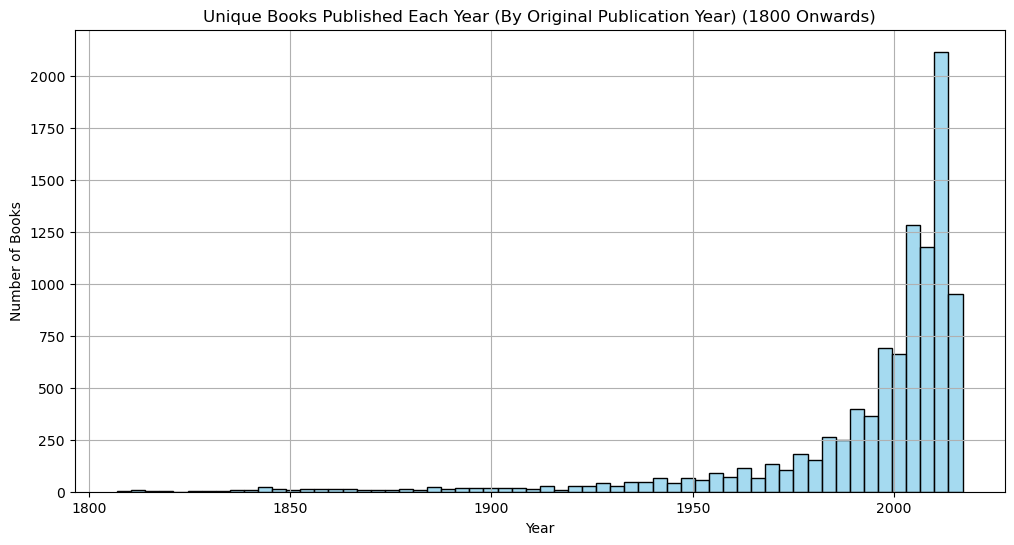

In [ ]:
# Visualise publication volume over years starting from 1800
# Shows trends in publishing activity and dataset coverage
plt.figure(figsize=(12,6))
sns.histplot(df['Original Publication Year'], bins=60, kde=False, color='skyblue')
plt.title('Unique Books Published Each Year (By Original Publication Year) (1800 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

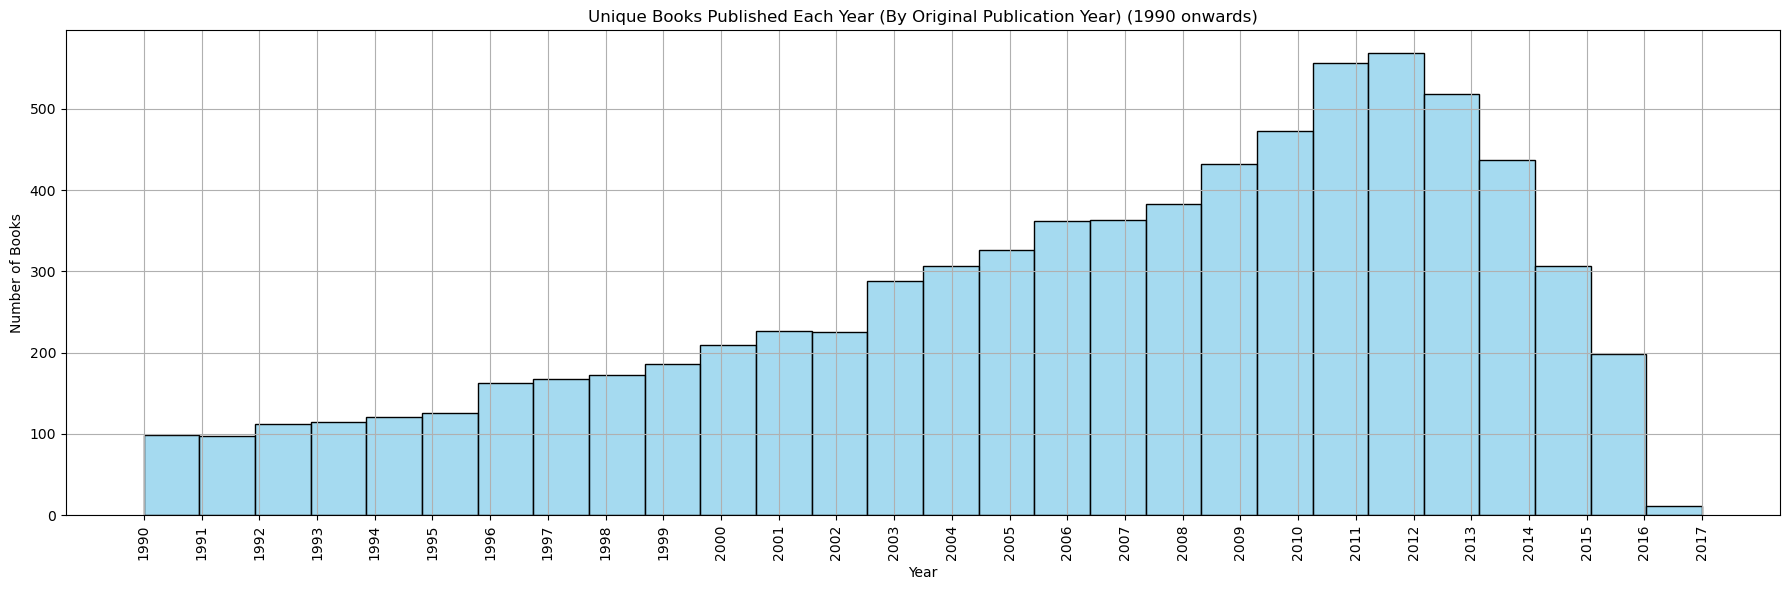

In [ ]:
# Focus on recent decades (from 1990 onwards) for finer-grained temporal insights
df_1990 = df[df['Original Publication Year'] >= 1990]

plt.figure(figsize=(18,6))
sns.histplot(df_1990['Original Publication Year'], 
             bins=(df_1990['Original Publication Year'].max() - 1990 + 1),
             color='skyblue', kde=False)

plt.title('Unique Books Published Each Year (By Original Publication Year) (1990 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Books')

# Show every year label on x-axis for detail
years = list(range(1990, df_1990['Original Publication Year'].max() + 1))
plt.xticks(years, rotation=90)

plt.grid(True)
plt.tight_layout()
plt.show()

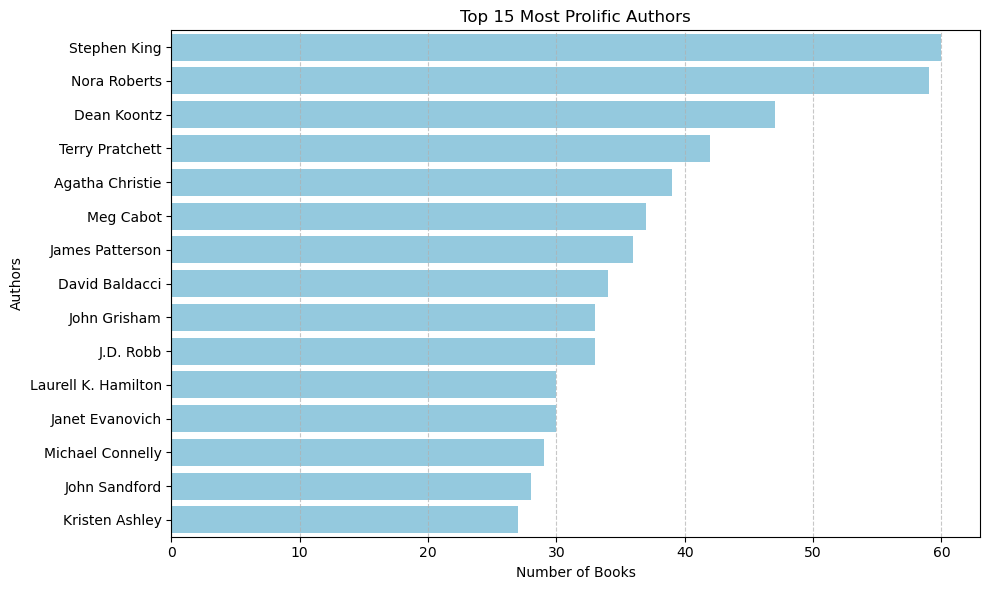

In [ ]:
# Identify top 15 most prolific authors by number of books in dataset
top_authors = df['Authors'].value_counts().head(15)

# Visualise the prolific authors to understand which authors dominate the dataset
plt.figure(figsize=(10,6))
sns.barplot(y=top_authors.index, x=top_authors.values, color='skyblue') 
plt.title('Top 15 Most Prolific Authors')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
top_authors = df['Authors'].value_counts().head(15)

# Calculate average rating for top authors to understand their overall reception
author_ratings = df.groupby('Authors')['Average Rating'].mean()

# Filter average ratings only for the top prolific authors for a fair comparison
top_author_ratings = author_ratings.loc[top_authors.index]

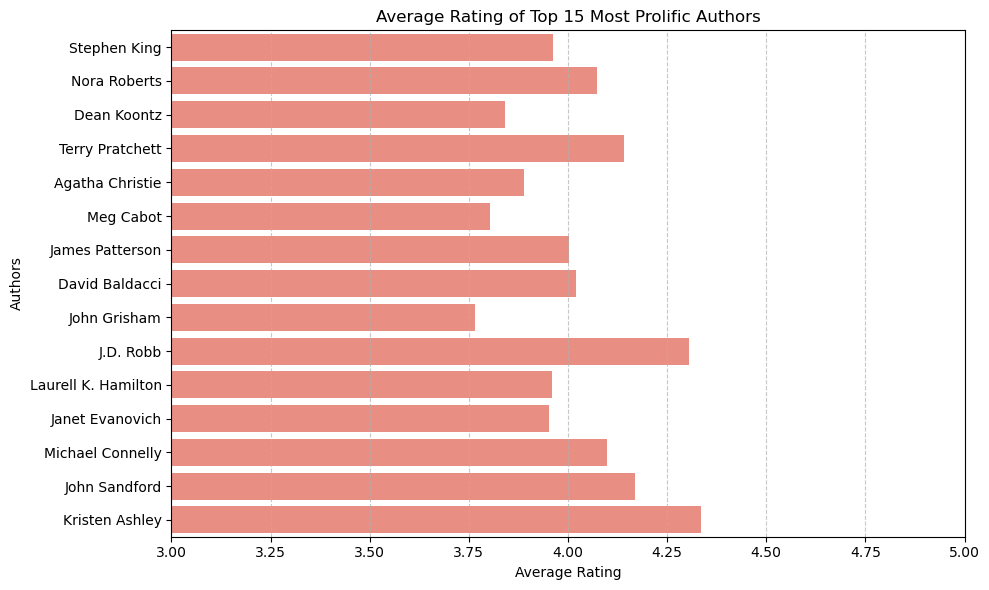

In [ ]:
# Visualise average rating for the top authors to correlate productivity with quality
plt.figure(figsize=(10,6))
sns.barplot(x=top_author_ratings.values, y=top_author_ratings.index, color='salmon')  
plt.title('Average Rating of Top 15 Most Prolific Authors')
plt.xlabel('Average Rating')
plt.ylabel('Authors')
plt.xlim(3, 5) # focus x-axis on typical rating range
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

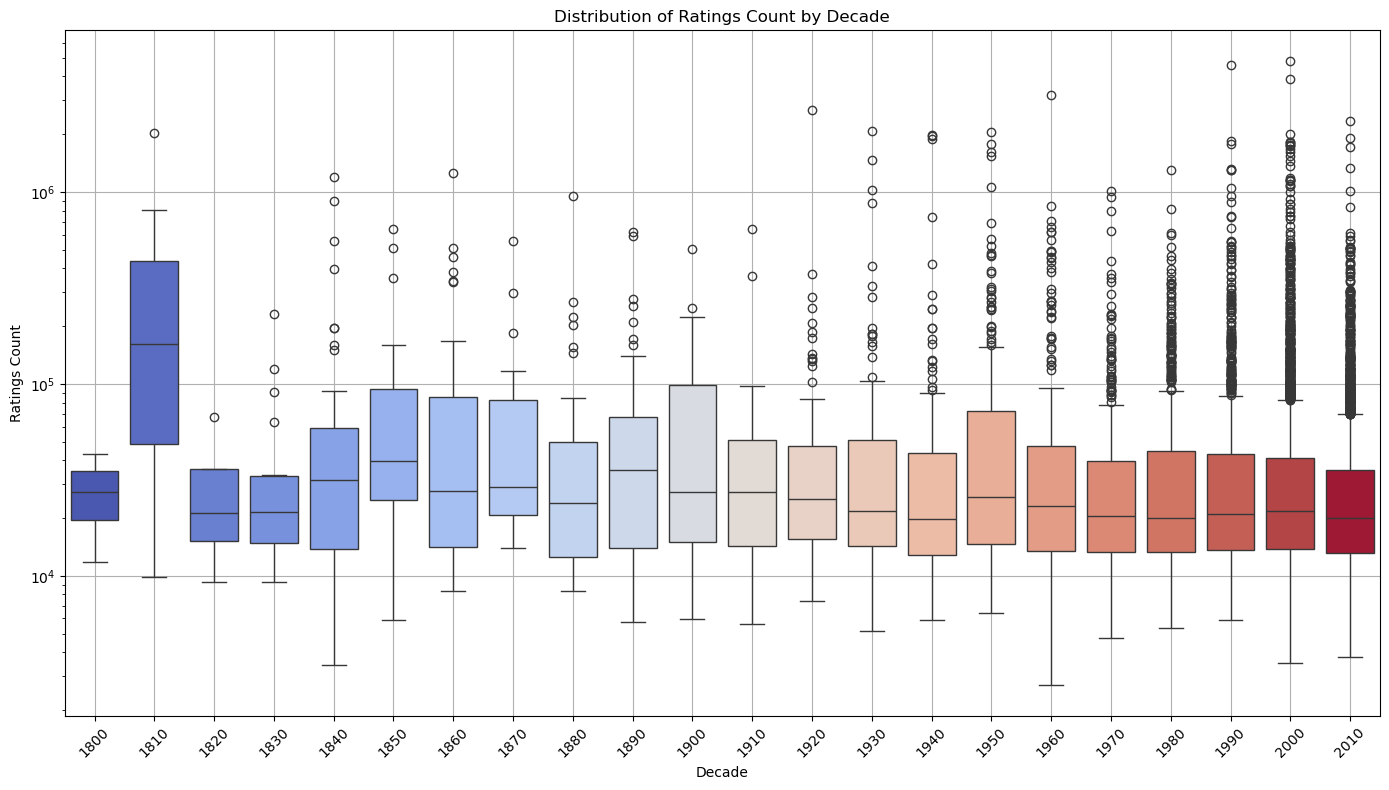

In [ ]:
# Create decade column to group books for temporal trend analysis
df['decade'] = (df['Original Publication Year'] // 10) * 10

# Boxplot of ratings count by decade to visualise distribution and outliers
# Log scale used due to skewed distribution of ratings count (some books extremely popular)
plt.figure(figsize=(14,8))
sns.boxplot(x='decade', y='Ratings Count', hue='decade', data=df, palette='coolwarm', dodge=False)
plt.title('Distribution of Ratings Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratings Count')
plt.yscale('log')  
plt.xticks(rotation=45)
plt.grid(True)

# Remove legend to avoid redundancy since hue duplicates x-axis
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

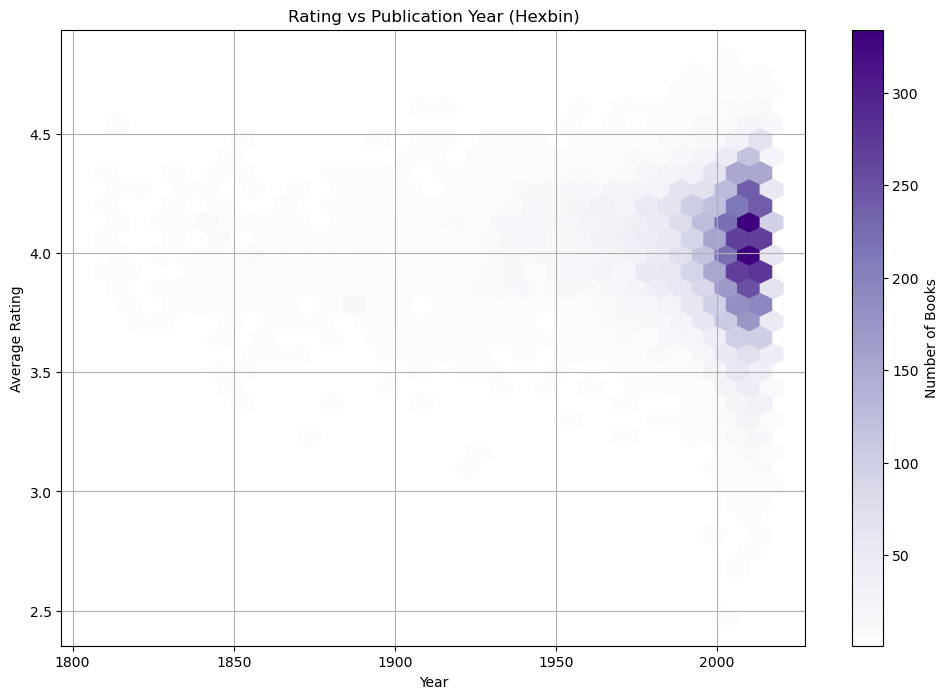

In [ ]:
# Hexbin plot to visualise relationship between publication year and average rating
# This shows density of books for different ratings over time, highlighting trends or clusters
plt.figure(figsize=(12,8))
plt.hexbin(df['Original Publication Year'], df['Average Rating'], gridsize=30, cmap='Purples', mincnt=1)
plt.colorbar(label='Number of Books')
plt.title('Rating vs Publication Year (Hexbin)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()